In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Runge-Kutta 4th Order Method

This notebook implements the 4th-order Runge-Kutta (RK4) method for solving ordinary differential equations (ODEs). Specifically, it will compute an example similar to the one discussed in the [Swarthmore Lecture on Numerical Integration.](https://lpsa.swarthmore.edu/NumInt/NumIntFourth.html)

## Overview

The RK4 method is a widely used technique for approximating solutions to differential equations due to its balance between accuracy and computational efficiency. This implementation uses the formula:


$y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)$


where:
* $k_1 = h \cdot f(t_n, y_n) $
* $k_2 = h \cdot f(t_n + \frac{h}{2}, y_n + \frac{k_1}{2}) $
* $k_3 = h \cdot f(t_n + \frac{h}{2}, y_n + \frac{k_2}{2}) $
* $k_4 = h \cdot f(t_n + h, y_n + k_3) $

This approach uses four estimates of the slope within each interval to compute the next value of  y .

## Example

The example ODE discussed in the Swarthmore reading will be used to demonstrate the RK4 method:


$\frac{dy}{dt} = -2y(t)$


## Implementation

The following code defines a general runge_kutta_4 function, which will be applied to a sample ODE. This approach allows for easy customization by changing the ODE function  $f$, initial conditions, and time range.

Notice that we compute the single step. Then we compute the full function. 

In [2]:
def runge_kutta_4_step(f:callable, t:float, y:float, h:float) -> float:
    """Returns the next estimate using the 4th-order Runge-Kutta method"""
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)

    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def runge_kutta_4(f:callable, y0:float, t0:float, tf:float, h:float) -> tuple[list[float], list[float]]:
    """Returns approximate solution of an ODE using the 4th-order Runge-Kutta method"""

    # Calculate the number of steps -- just like Euler's method
    n = int((tf - t0) / h)
    
    # Initialize arrays for time and y values
    t_values = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n+1)
    y_values[0] = y0
    
    # Iterate over the time array
    for i in range(n):
        y_values[i+1] = runge_kutta_4_step(f, t_values[i], y_values[i], h)
        
    return t_values, y_values


Now let us compute the specific example. 

In [3]:
# Example from reading
# Exact answer is y(t) = e^(-2t)

def f(t, y):
    """ Returns the derivative of y at time t """
    return -2*y

In [4]:
# Example from reading

y0 = 3  # initial value of y(0) = 3
t0 = 0  # start time
tf = 2 # end time
h = 0.2 # step size

# Run the RK4 method
t_values_rk4, y_values_rk4 = runge_kutta_4(f, y0, t0, tf, h)


In [5]:
# Display results nicely 
for t, y in zip(t_values_rk4, y_values_rk4):
    print(f"t = {t:.2f}, y = {y:.4f}")

t = 0.00, y = 3.0000
t = 0.20, y = 2.0112
t = 0.40, y = 1.3483
t = 0.60, y = 0.9039
t = 0.80, y = 0.6060
t = 1.00, y = 0.4062
t = 1.20, y = 0.2723
t = 1.40, y = 0.1826
t = 1.60, y = 0.1224
t = 1.80, y = 0.0821
t = 2.00, y = 0.0550


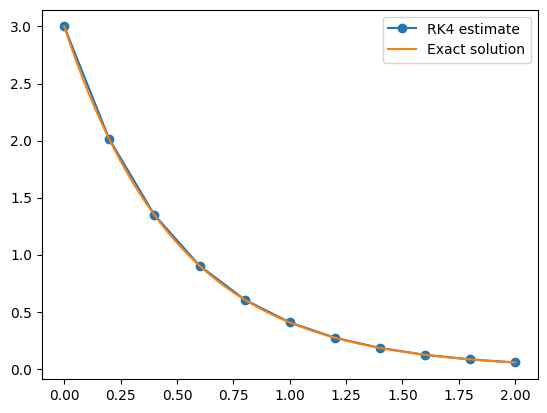

In [6]:
# graph estimate against the exact solution 

t_exact = np.linspace(t0, tf, 100)
y_exact = y0 * np.exp(-2*t_exact)
plt.plot(t_values_rk4, y_values_rk4, 'o-', label='RK4 estimate')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.legend()
plt.show()

In [7]:
# compute error by looking at the difference between the estimate and the true value at t=2:
y_exact_2 = y0 * np.exp(-2*tf)
error = y_exact_2 - y_values_rk4[-1]
print(f"Runge-Kutta4 Error at t=2: {error:.4f}")

Runge-Kutta4 Error at t=2: -0.0001


## How does this compare to Euler's method? 

Let's compare our findings with Euler's method and graph the two against each other to see how much of an improvement this is. 

In [8]:
# How does this compare to the Euler method? 

def euler_step(f:callable, t:float, y:float, h:float) -> float:
    """Returns the next estimate using the Euler method"""
    return y + h * f(t, y)

def euler(f:callable, y0:float, t0:float, tf:float, h:float) -> tuple[list[float], list[float]]:
    """Returns approximate solution of an ODE using the Euler method"""

    # Calculate the number of steps -- just like Euler's method
    n = int((tf - t0) / h)
    
    # Initialize arrays for time and y values
    t_values = np.linspace(t0, tf, n+1)
    y_values = np.zeros(n+1)
    y_values[0] = y0
    
    # Iterate over the time array
    for i in range(n):
        y_values[i+1] = euler_step(f, t_values[i], y_values[i], h)
        
    return t_values, y_values


In [9]:
# Example from reading

y0 = 3  # initial value of y(0) = 3
t0 = 0  # start time
tf = 2 # end time
h = 0.2 # step size

# Run the Euler method
t_values_euler, y_values_euler = euler(f, y0, t0, tf, h)

In [10]:
# Display results nicely 
for t, y in zip(t_values_euler, y_values_euler):
    print(f"t = {t:.2f}, y = {y:.4f}")

t = 0.00, y = 3.0000
t = 0.20, y = 1.8000
t = 0.40, y = 1.0800
t = 0.60, y = 0.6480
t = 0.80, y = 0.3888
t = 1.00, y = 0.2333
t = 1.20, y = 0.1400
t = 1.40, y = 0.0840
t = 1.60, y = 0.0504
t = 1.80, y = 0.0302
t = 2.00, y = 0.0181


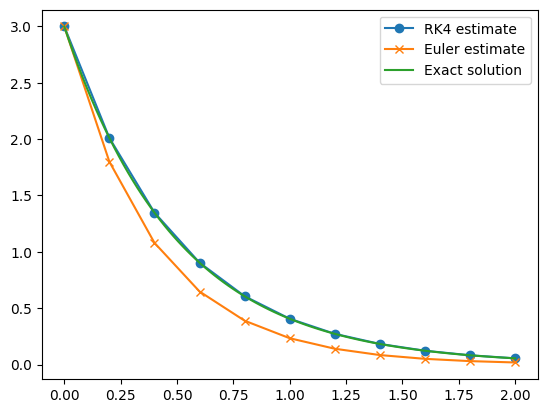

In [11]:
# graph estimate against the exact solution 
t_exact = np.linspace(t0, tf, 100)
y_exact = y0 * np.exp(-2*t_exact)
plt.plot(t_values_rk4, y_values_rk4, 'o-', label='RK4 estimate')
plt.plot(t_values_euler, y_values_euler, 'x-', label='Euler estimate')
plt.plot(t_exact, y_exact, label='Exact solution')
plt.legend()
plt.show()

In [12]:
# Euler Error 
# compute error by looking at the difference between the estimate and the true value at t=2:
error = y_exact_2 - y_values_euler[-1]
print(f"Euler Error at t=2: {error:.4f}")

Euler Error at t=2: 0.0368


Notice that our error is much larger by comparison! 